In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Q1
Consider the hepatitis/ pima-indians-diabetes csv file, perform the following date pre-processing.
1. Load data in Pandas.
2. Drop columns that aren’t useful.
3. Drop rows with missing values.
4. Create dummy variables.
5. Take care of missing data.
6. Convert the data frame to NumPy.
7. Divide the data set into training data and test data.


### Loading Data

In [55]:
diabetes_df=pd.read_csv('diabetes_csv.csv')

In [105]:
hepatitis_df=pd.read_csv('hepatitis_csv.csv')

## Diabetes

In [57]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [58]:
diabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

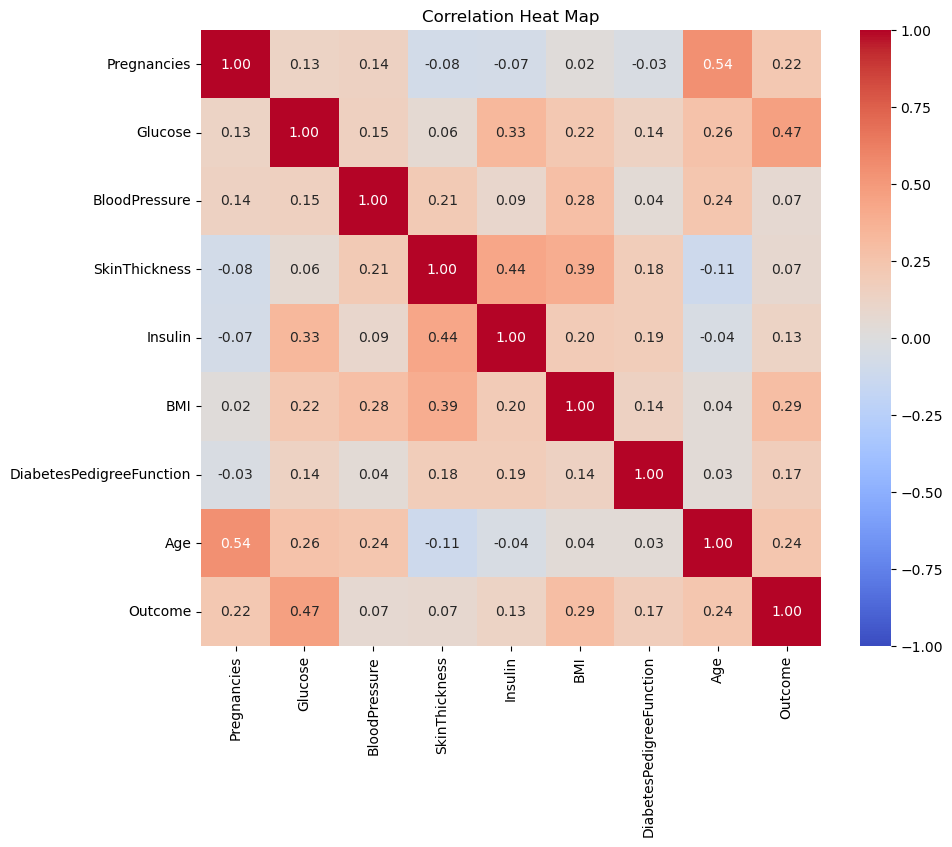

In [59]:
corr=diabetes_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heat Map for Diabetes DF')
plt.show()

No missing data to take care therefore dropping the columns that are not useful:

SkinThickness and BloodPressure

In [60]:
diabetes_df = diabetes_df.drop(['SkinThickness', 'BloodPressure'], axis=1)
diabetes_df

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101,180,32.9,0.171,63,0
764,2,122,0,36.8,0.340,27,0
765,5,121,112,26.2,0.245,30,0
766,1,126,0,30.1,0.349,47,1


In [65]:
diabetes_numpy = diabetes_df.to_numpy()

### Splitting Data into test and train set

In [127]:
shuffled_diabetes_df = diabetes_df.sample(frac=1)

train_size = int(0.7 * len(df))

diabetes_train_set = shuffled_diabetes_df[:train_size]
diabetes_test_set = shuffled_diabetes_df[train_size:]

In [128]:
diabetes_train_set

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
719,5,97,0,35.6,0.378,52,1
288,4,96,49,20.8,0.340,26,0
279,2,108,278,25.3,0.881,22,0
557,8,110,0,27.8,0.237,58,0
205,5,111,0,23.9,0.407,27,0
...,...,...,...,...,...,...,...
91,4,123,176,32.0,0.443,34,0
467,0,97,100,36.8,0.600,25,0
421,2,94,76,26.0,0.561,21,0
105,1,126,152,28.7,0.801,21,0


## Hepatitis

In [106]:
hepatitis_df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


In [112]:
hepatitis_df.loc[hepatitis_df['sex'] == 'male', 'sex'] = 0
hepatitis_df.loc[hepatitis_df['sex'] == 'female', 'sex'] = 1
hepatitis_df.loc[hepatitis_df['class'] == 'die', 'class'] = 0
hepatitis_df.loc[hepatitis_df['class'] == 'live', 'class'] = 1

hepatitis_df = hepatitis_df.replace({True: int(1), False: int(0)})

hepatitis_df.isna().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

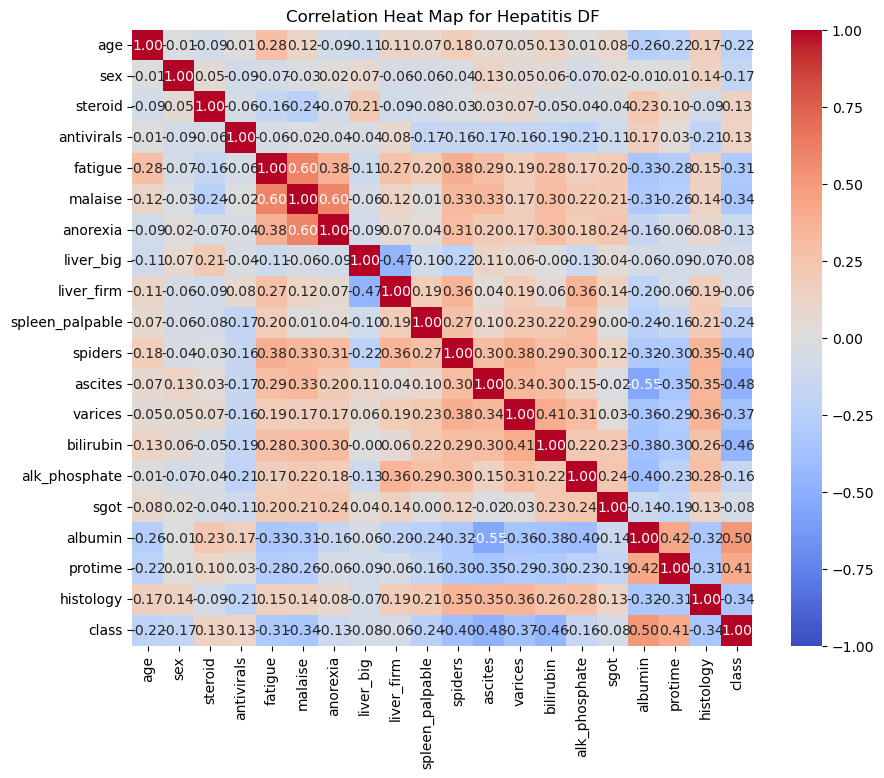

In [113]:
corr=hepatitis_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heat Map for Hepatitis DF')
plt.show()

Dropping liver_big, liver_firm and sgot

In [114]:
hepatitis_df = hepatitis_df.drop(['liver_big', 'liver_firm', 'sgot'], axis=1)

Filling alk_plosphate, albumin and protime columns with mean values

In [117]:
hepatitis_median=hepatitis_df.median()
hepatitis_df.fillna(hepatitis_median, inplace=True)

In [116]:
hepatitis_df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,albumin,protime,histology,class
0,30,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,85.0,4.0,61.0,0,1
1,50,1,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,135.0,3.5,61.0,0,1
2,78,1,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,96.0,4.0,61.0,0,1
3,31,1,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,46.0,4.0,80.0,0,1
4,34,1,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,85.0,4.0,61.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,1.0,0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,7.6,85.0,3.3,50.0,1,0
151,44,1,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,126.0,4.3,61.0,1,1
152,61,1,0.0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.8,75.0,4.1,61.0,1,1
153,53,0,0.0,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.5,81.0,4.1,48.0,1,1


In [118]:
hepatitis_numpy = hepatitis_df.to_numpy()

### Splitting Data into test and train set

In [125]:
shuffled_hepatitis_df = hepatitis_df.sample(frac=1)

train_size = int(0.7 * len(df))

hepatitis_train_set = shuffled_hepatitis_df[:train_size]
hepatitis_test_set = shuffled_hepatitis_df[train_size:]

In [126]:
hepatitis_train_set

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,albumin,protime,histology,class
32,41,0,1.0,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.7,81.0,5.0,74.0,0,1
48,36,1,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.8,85.0,4.2,85.0,0,1
63,36,1,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.7,164.0,3.1,41.0,0,1
86,44,1,0.0,0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.9,135.0,4.0,41.0,1,0
81,36,1,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,62.0,4.2,100.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,45,1,1.0,0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.9,85.0,2.4,61.0,1,0
0,30,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,85.0,4.0,61.0,0,1
84,62,0,1.0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.3,141.0,3.9,58.0,0,1
148,20,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,89.0,4.0,61.0,1,1


# Q2
a. Construct a CSV file with the following attributes:
Study time in hours of ML lab course (x)
Score out of 10 (y)
The dataset should contain 10 rows.

b. Create a regression model and display the following:
Coefficients: B0 (intercept) and B1 (slope)
RMSE (Root Mean Square Error)
Predicted responses

c. Create a scatter plot of the data points in red color and plot the graph of x vs. predicted y in blue color.

d. Implement the model using two methods:
Pedhazur formula (intuitive)
Calculus method (partial derivatives, refer to class notes)

e. Compare the coefficients obtained using both methods and compare them with the analytical solution.

f. Test your model to predict the score obtained when the study time of a student is 10 hours.

Note: Do not use scikit-learn.

In [132]:
df=pd.read_csv('study_score.csv')
X = df['Study_time']
y = df['Score']
df

,Study_time,Score
0,1,2
1,2,3
2,3,5
3,4,6
4,5,8
5,6,7
6,7,8
7,8,9
8,9,10
9,10,9


### Matrix Method

In [135]:
n = len(X)
X_mean = np.mean(X)
y_mean = np.mean(y)
xy_sum = np.sum(X * y)
x_sum = np.sum(X)
y_sum = np.sum(y)
x_squared_sum = np.sum(X ** 2)

B1 = (n * xy_sum - x_sum * y_sum) / (n * x_squared_sum - x_sum ** 2)
B0 = y_mean - B1 * X_mean

print(f'Pedhazur Method - B0 (intercept): {B0}')
print(f'Pedhazur Method - B1 (slope): {B1}')

Pedhazur Method - B0 (intercept): 2.1333333333333337
Pedhazur Method - B1 (slope): 0.8303030303030303


### Calculus Method

In [136]:
X = np.array(X)
y = np.array(y)

X_design = np.vstack([np.ones(n), X]).T

coefficients = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ y
B0_calculus, B1_calculus = coefficients

print(f'Calculus Method - B0 (intercept): {B0_calculus}')
print(f'Calculus Method - B1 (slope): {B1_calculus}')

Calculus Method - B0 (intercept): 2.1333333333333346
Calculus Method - B1 (slope): 0.8303030303030303


### RMSE and Predicted Responses

In [137]:
y_pred = B0_calculus + B1_calculus * X

mse = np.mean((y - y_pred) ** 2)
rmse = np.sqrt(mse)

print(f'RMSE: {rmse}')
print(f'Predicted Responses: {y_pred}')

RMSE: 0.8499554355519132
Predicted Responses: [ 2.96363636  3.79393939  4.62424242  5.45454545  6.28484848  7.11515152
  7.94545455  8.77575758  9.60606061 10.43636364]


### Scatter Plot

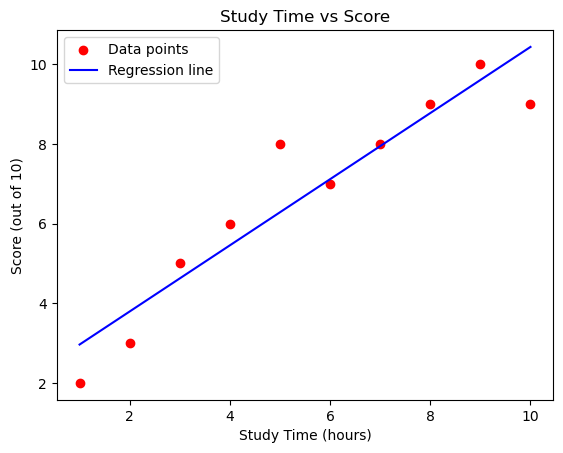

In [138]:
plt.scatter(X, y, color='red', label='Data points')

# Regression line
plt.plot(X, y_pred, color='blue', label='Regression line')

plt.xlabel('Study Time (hours)')
plt.ylabel('Score (out of 10)')
plt.title('Study Time vs Score')
plt.legend()
plt.show()

### Testing

In [139]:
study_time_test = 10
predicted_score = B0_calculus + B1_calculus * study_time_test

print(f'Predicted score for {study_time_test} hours of study: {predicted_score}')

Predicted score for 10 hours of study: 10.436363636363637
